In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np

from yass.preprocessing import Preprocessor
from yass.mainprocess import Mainprocessor
from yass.deconvolution import Deconvolution
import yass

logging.basicConfig(level=logging.DEBUG)

In [25]:
! pwd

/Users/Edu/dev/grossman/yass-private/notebooks


In [56]:
# neural network detector
cfg = yass.Config.from_yaml('../config/threshold100k.yaml')
pp = Preprocessor(cfg)
score, clr_idx, spt = pp.process()

INFO:yass.preprocessing:Preprocessing the data in progress...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 0, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 1, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 2, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 3, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 4, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 5, but get_score is False, returning zeros in score and clr_idx...
DEBUG:yass.preprocess.waveform:Spikes detected with main channel 6, but get_score is False, returning zeros in score and clr_idx...
N/A% (0 of 1) 

('1 batch added', 60)
('writing', (700840,), dtype('int16'), <open file '/users/Edu/data/yass/tmp/wrec.bin', mode 'wb' at 0x11c362780>, 1401680, 2)
('chunk size in bytes is', 1401680)
closing...
('flattenedLength', 100120, 7)
('size of file', 1401680)
/users/Edu/data/yass/tmp/wrec.bin
('seek', 0)
('read', 1401680)
('wf_file read', 1401680)
('wf_file read int 16', (700840,))
('rec has length', 100120)


In [4]:
score[1]

array([[[  2.42663853e-01,  -1.75632059e+00,   3.19749087e-01,
          -1.34174434e-01],
        [  1.12307664e+00,   6.21154111e+00,   1.30743560e+00,
           1.51504574e+00],
        [  4.55603970e-01,   9.71260521e+00,  -1.72104538e+00,
           2.61640618e+00]],

       [[ -3.47705965e+00,  -2.12873071e+00,   9.29952436e-01,
           6.46383112e-01],
        [  9.57712619e+00,   6.44830523e+00,  -3.19463170e+00,
           7.61932633e+00],
        [  9.69341638e+00,   1.40251535e+01,  -8.97355897e-01,
           3.58459043e+00]],

       [[ -2.89085823e+00,  -7.64294263e-01,   2.79556086e+00,
           6.22308438e-01],
        [  1.06768918e+01,   7.90013624e+00,  -1.95589842e+00,
           8.20374443e+00],
        [  9.37828737e+00,   1.39442209e+01,  -2.56810147e+00,
           4.27487966e+00]],

       [[ -4.10088548e+00,  -1.32596970e+00,   1.64133557e+00,
           3.04768977e+00],
        [  4.04660901e+00,   3.90897507e+00,   3.53136289e+00,
          -1.82502664

In [5]:
[s.shape for s in score]

[(24, 3, 7),
 (72, 3, 4),
 (14, 3, 4),
 (18, 3, 4),
 (140, 3, 4),
 (111, 3, 4),
 (165, 3, 4)]

In [6]:
[c.shape for c in clr_idx]

[(24,), (72,), (14,), (18,), (140,), (111,), (165,)]

In [7]:
clr_idx[0]

array([ 15,  24,  29,  31,  39,  64, 104, 105, 110, 111, 119, 123, 144,
       158, 163, 175, 177, 182, 222, 252, 265, 290, 305, 307])

In [8]:
[s.shape for s in spt]

[(309, 2), (1446, 2), (894, 2), (945, 2), (1259, 2), (975, 2), (950, 2)]

In [9]:
spt[0][15]

array([4807,    0], dtype=int32)

In [10]:
mp = Mainprocessor(cfg, score, clr_idx, spt)
spike_train, spt_left = mp.mainProcess()

INFO:yass.mainprocess:Triaging...
INFO:yass.mainprocess:Coresettting...
INFO:yass.mainprocess:Masking...
INFO:yass.mainprocess:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Mainprocess done in 1 seconds.
INFO:yass.mainprocess:	triage:	0.015695 seconds
INFO:yass.mainprocess:	coreset:	0.156232 seconds
INFO:yass.mainprocess:	masking:	0.010166 seconds
INFO:yass.mainprocess:	clustering:	1.543597 seconds
INFO:yass.mainprocess:	make templates:	0.055929 seconds


In [11]:
spike_train.shape

(447, 2)

In [12]:
[l.shape for l in spt_left]

[(293, 2), (1382, 2), (887, 2), (931, 2), (1143, 2), (885, 2), (810, 2)]

In [13]:
mp.templates.shape

(7, 31, 6)

In [14]:
dc = Deconvolution(cfg, np.transpose(mp.templates,[1,0,2]), spt_left)
spikeTrain_col = dc.fullMPMU()

DEBUG:yass.deconvolution:wfile is /users/Edu/data/yass/tmp/wrec.bin 1401680
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [15]:
spikeTrain_col.shape

(697, 2)

In [16]:
spikeTrain_col.shape

(697, 2)

In [17]:
spikeTrain_col

array([[ 1274,     0],
       [ 1642,     0],
       [ 2047,     0],
       ..., 
       [23432,     0],
       [44491,     0],
       [71682,     0]])

In [18]:
mp.templates.shape

(7, 31, 6)

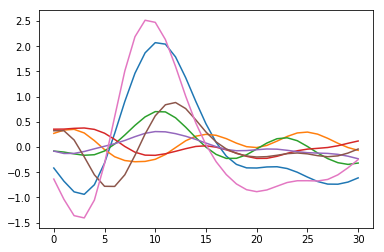

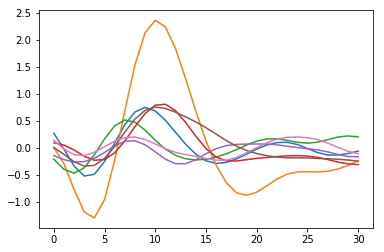

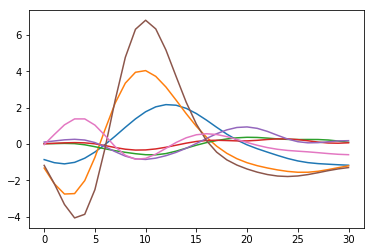

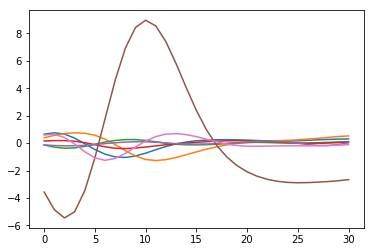

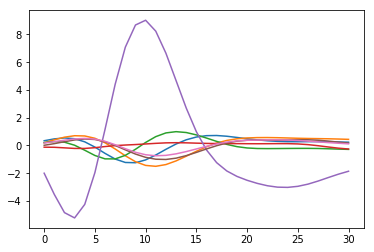

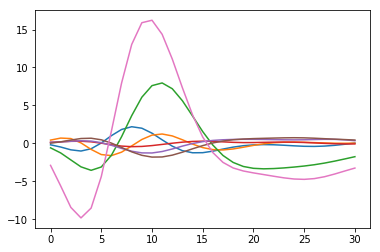

In [19]:
for t in np.transpose(mp.templates,[2,1,0]):
    plt.plot(t)
    plt.show()

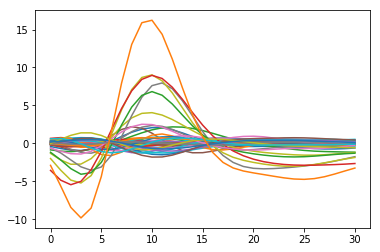

In [20]:
for t in mp.templates:
    plt.plot(t)

plt.show()

In [21]:
whiten = np.fromfile(os.path.join(cfg.root, 'tmp/wrec.bin'),
                   dtype='int16')
whiten = whiten.reshape((100120, 7))

In [22]:
whiten.shape

(100120, 7)

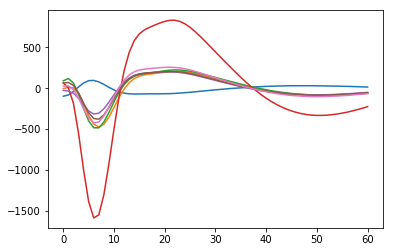

In [23]:
for t in whiten.T:
    plt.plot(t[-61:])

plt.show()